<a href="https://colab.research.google.com/github/NDsasuke/Autocorrelation-function-Diagnostics-and-prediction/blob/main/Autocorrelation%20Function/%20Autocorrelation%20Function%20(ACF)%20Fundamentals/Autocorrelation_Based_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing necessary libraries:




In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression

2. Loading the online dataset:

This segment imports the dataset from the provided URL, parses the 'Month' column as dates, and sets it as the index. It then extracts the 'Passengers' column values and assigns them to the variable `data`.



In [14]:
# Load the online dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = df['Passengers'].values

3. Computing the Autocorrelation Function (ACF):

Here, a Figure and Axes objects are created using `plt.subplots()`. The `plot_acf()` function is called to compute and plot the autocorrelation function (ACF) for `data` up to a maximum lag of 30. The resulting ACF plot is displayed on the Axes object `ax`.



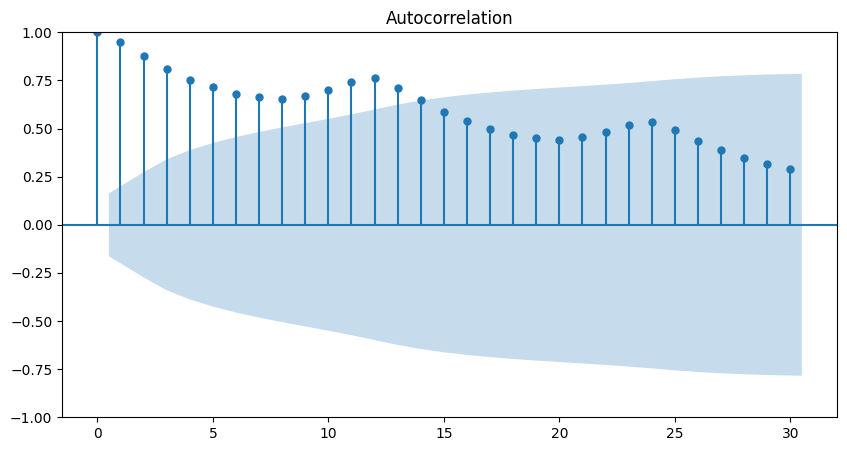

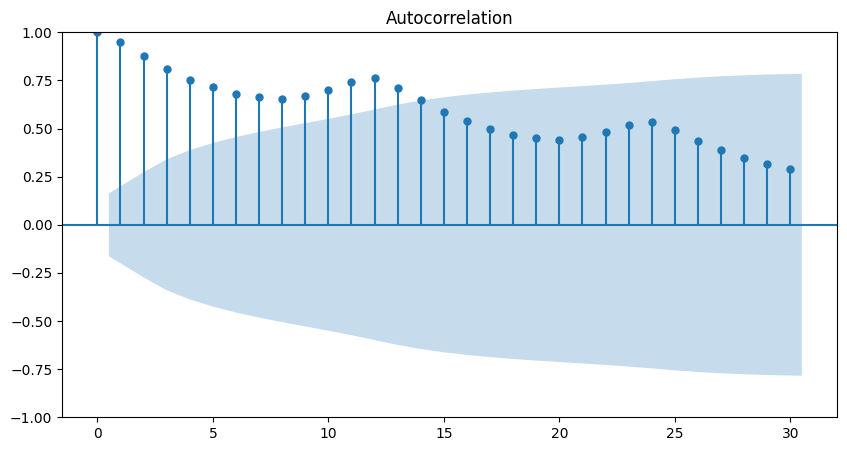

In [15]:

# Compute the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(data, lags=30, alpha=0.05, ax=ax)

4. Extracting ACF values:

This line extracts the y-data (ACF values) from the first line of the ACF plot on the Axes object `ax` and assigns it to the variable `acf_values`.



In [16]:
# Extract the ACF values from the Figure object
acf_values = ax.lines[0].get_ydata()

5. Identifying the lag with the highest positive autocorrelation:

Using NumPy's `argmax()` function, this line finds the index of the maximum value in `acf_values[1:]`, which corresponds to the highest positive autocorrelation. Adding 1 accounts for the 0-lag at index 0. The lag with the highest positive autocorrelation is assigned to the variable `best_lag`.



In [17]:
# Identify the lag with the highest positive autocorrelation
best_lag = np.argmax(acf_values[1:]) + 1

6.  Preparing the data for forecasting:

This segment prepares the input data (X) and target data (y) for training a linear regression model. The X array contains data values shifted by -best_lag, while the y array contains the original data values starting from the best_lag index. The arrays are reshaped to have a single feature and are assigned to the variables X and y, respectively.


In [18]:

# Prepare the data for forecasting
X = np.array([data[:-best_lag]]).T
y = np.array([data[best_lag:]]).T


7.  Fitting a linear regression model:

A linear regression model is created using LinearRegression(), and the fit() method is called to train the model on the X and y data.

In [19]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

6.  Predicting future values based on the linear regression model:

The future_X array is created with the last -best_lag values from data, reshaped to have a single feature. The linear regression model (model) is then used to predict the future values (future_predictions) based on future_X.

In [20]:
# Predict future values based on the linear regression model
future_X = np.array([data[-best_lag:]]).T
future_predictions = model.predict(future_X)

9.  Extending the index for future predictions:

The future_index is generated using pd.date_range() to create a date range starting from the last index of df.index (the original data's index) and consisting of best_lag+1 periods with a monthly frequency ('MS').

In [21]:
# Extend the index for future predictions
future_index = pd.date_range(start=df.index[-1], periods=best_lag+1, freq='MS')

10.  Plotting the original data and the predicted future values:

This segment creates a new figure, plots the original data as a line plot, and overlays the predicted future values as another line plot. The x-axis is labeled as "Month," the y-axis as "Passengers," and a title is added. A legend is displayed to differentiate between the original data and future predictions. Finally, the grid is enabled, and the plot is shown.

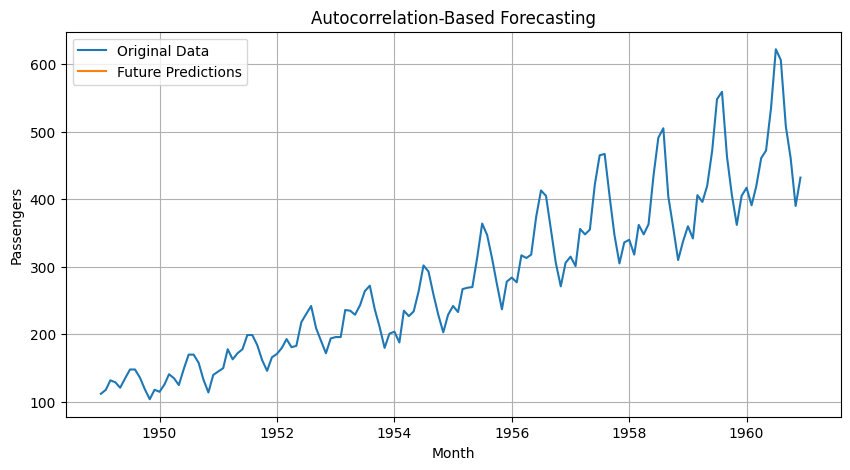

In [22]:
# Plot the original data and the predicted future values
plt.figure(figsize=(10, 5))
plt.plot(df.index, data, label='Original Data')
plt.plot(future_index[1:], future_predictions.flatten(), label='Future Predictions')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Autocorrelation-Based Forecasting')
plt.legend()
plt.grid(True)
plt.show()
